In [1]:
# Install necessary libraries (run only once in Colab)
!pip install openpyxl pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable better chart aesthetics
sns.set(style="whitegrid")


In [3]:
# Run this cell to upload file in Colab
from google.colab import files
uploaded = files.upload()

Saving Raj Fashion_Sales _Data (2).xlsx to Raj Fashion_Sales _Data (2).xlsx


In [4]:
# Load the Excel file
xls = pd.ExcelFile("Raj Fashion_Sales _Data (2).xlsx")

# Show available sheet names
xls.sheet_names


['sales data',
 'calculative part 1',
 'Descriptive Stat',
 'calculative part 2',
 'calculative part 3',
 'calculative part 4']

In [5]:
# Load main sheet used for calculations
df = xls.parse("calculative part 1")

# Preview the data
df.head()


,Date,Month,Product Name,Customer Name,Cost Price,Sell Price,Quantity,Profit per Unit,Total Sales Value,Total Cost,Total Profit,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2024-10-01,October,Trousers,Vikas Mehta,250,599,1,349,599,250,349,NaN,Create a Pivot Table for Profit Margins,NaN,NaN,NaN,Analyzing the daily sales trends
1,2024-10-01,October,Shirt,Anita Roy,1222,1406,4,184,5624,4888,736,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-01,October,Ethnic Wear,Suman Das,942,1093,5,151,5465,4710,755,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-01,October,Footwear,Arun Kumar,1252,1628,2,376,3256,2504,752,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-01,October,Accessories,Rajesh Gupta,370,839,1,469,839,370,469,NaN,NaN,NaN,NaN,NaN,NaN


### Monthly Profit Margin Analysis

<ipython-input-6-7cfd4f5d3340>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Profit Margin (%)", data=monthly_profit, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


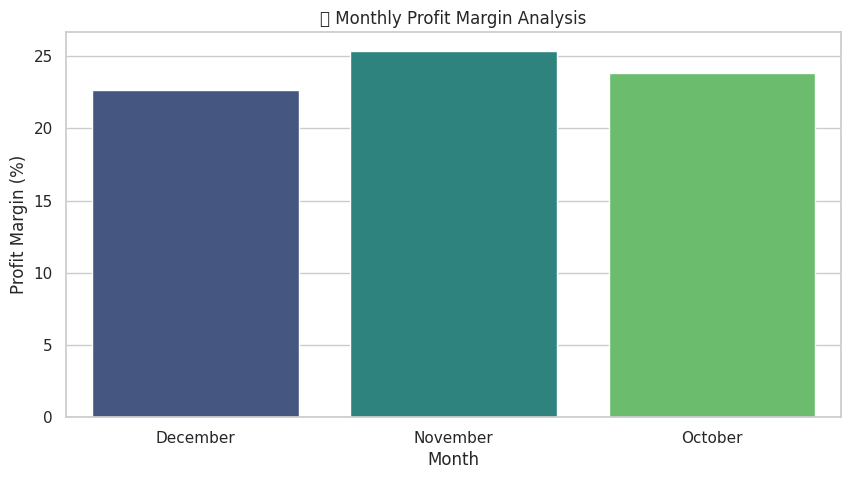

In [6]:
monthly_profit = df.groupby("Month")[["Total Profit", "Total Sales Value"]].sum().reset_index()
monthly_profit["Profit Margin (%)"] = (monthly_profit["Total Profit"] / monthly_profit["Total Sales Value"]) * 100

# Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(x="Month", y="Profit Margin (%)", data=monthly_profit, palette="viridis")
plt.title("💰 Monthly Profit Margin Analysis")
plt.ylabel("Profit Margin (%)")
plt.show()


### Top Selling Products by Quantity

<ipython-input-7-cfae25f4da2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


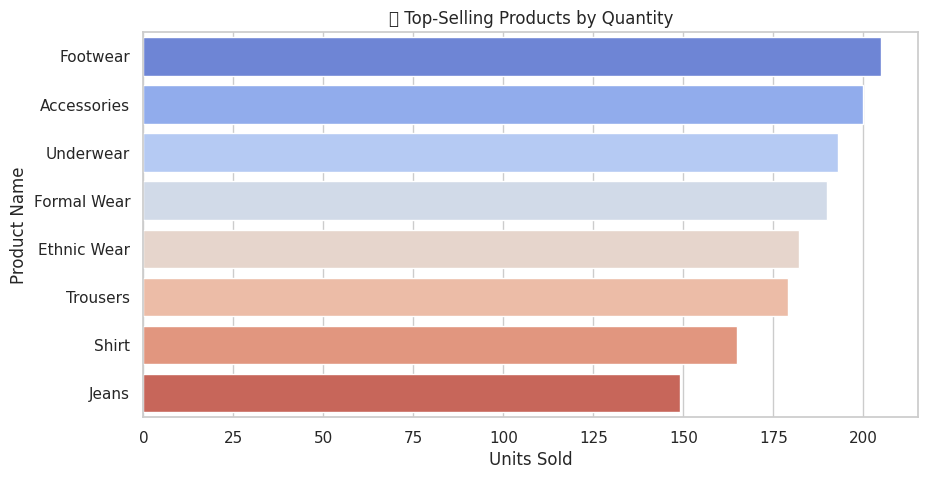

In [7]:
top_products = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("🛍️ Top-Selling Products by Quantity")
plt.xlabel("Units Sold")
plt.show()


### Top 10 Customers by Spending

<ipython-input-8-63f4e33a7d50>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="rocket")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


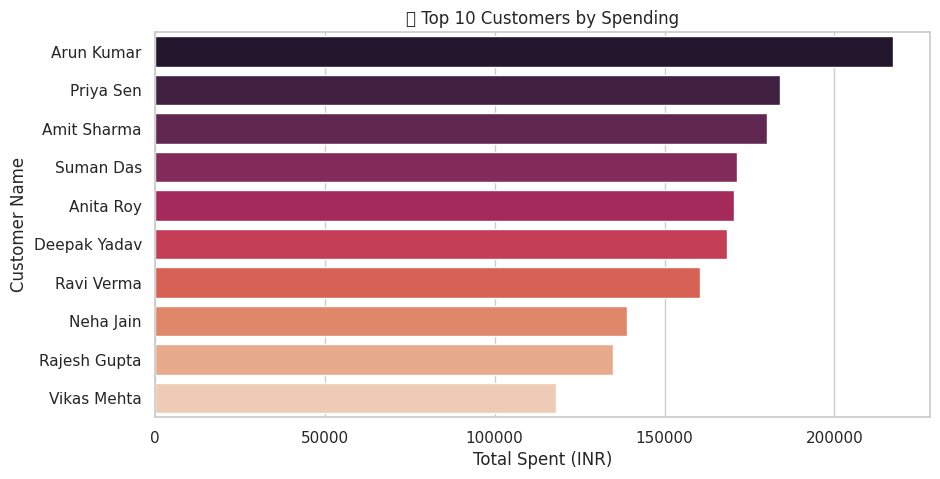

In [8]:
top_customers = df.groupby("Customer Name")["Total Sales Value"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="rocket")
plt.title("👑 Top 10 Customers by Spending")
plt.xlabel("Total Spent (INR)")
plt.show()


###Linear Regression (Sell Price vs Quantity)

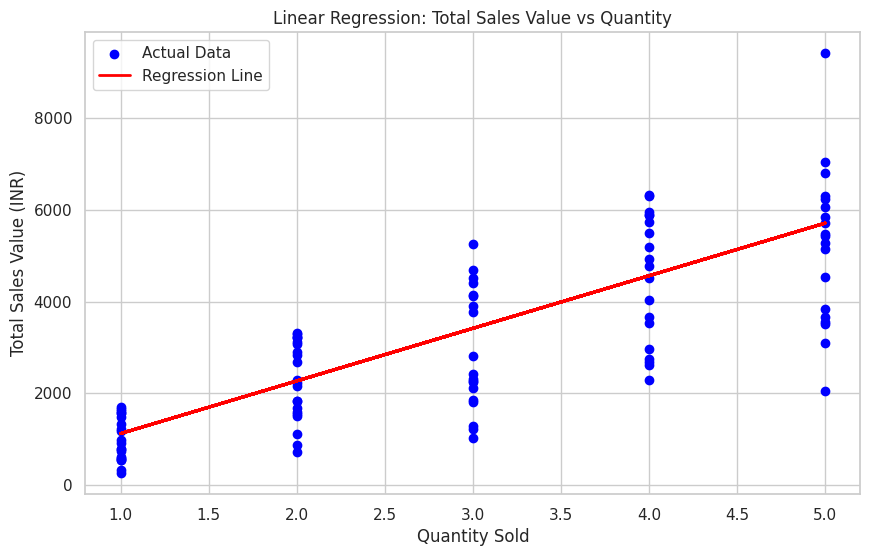

Intercept: -24.908926780341517
Coefficient (Quantity): 1147.0526245402878


In [9]:
# prompt: Linear Regression (Sell Price vs Quantity)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for linear regression
# We'll use 'Total Sales Value' as 'Sell Price' (since unit price isn't directly available)
# and 'Quantity'
X = df[['Quantity']]  # Independent variable (feature)
y = df['Total Sales Value']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the regression line and the test data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Total Sales Value vs Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales Value (INR)')
plt.legend()
plt.show()

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient (Quantity): {model.coef_[0]}')

# Interpretation:
# The intercept is the estimated Total Sales Value when Quantity is 0.
# The coefficient for Quantity indicates how much the Total Sales Value is expected to change for a one-unit increase in Quantity.


###Heatmap (Product vs Month vs Total Profit)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


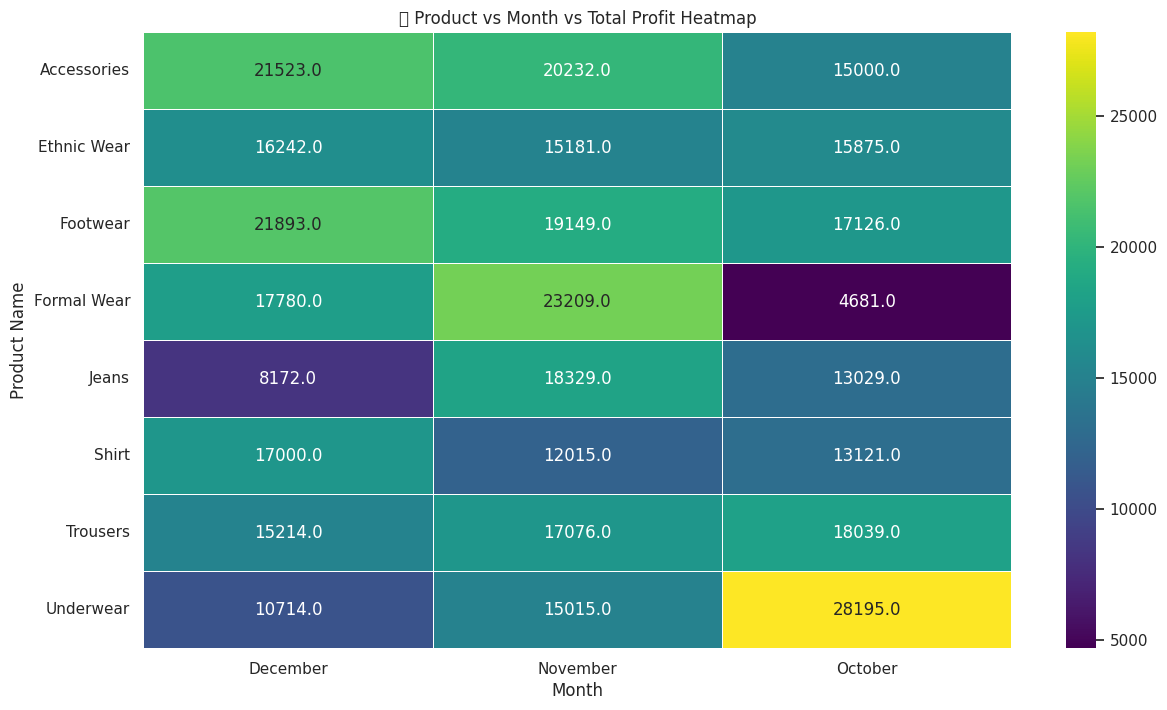

In [10]:
# Prepare data for the heatmap
heatmap_data = df.pivot_table(index="Product Name", columns="Month", values="Total Profit", aggfunc="sum")

# Fill NaN values with 0 (assuming no sales means no profit)
heatmap_data = heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".1f", linewidths=.5)
plt.title("🔥 Product vs Month vs Total Profit Heatmap")
plt.xlabel("Month")
plt.ylabel("Product Name")
plt.show()

###Boxplot (Profit per Unit by Product Type)

<ipython-input-11-3115e9eb0736>:5: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


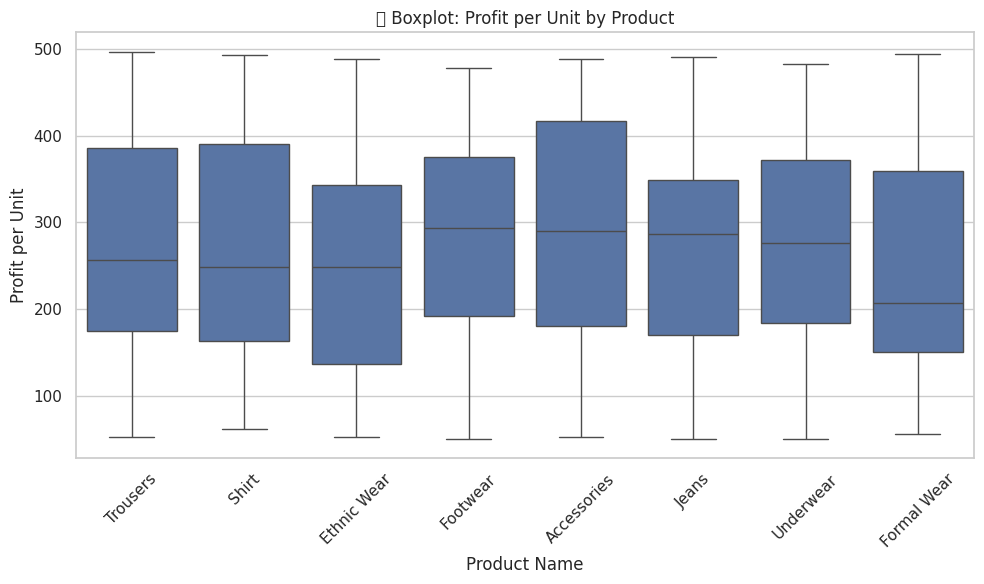

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Product Name", y="Profit per Unit", data=df)
plt.title("📦 Boxplot: Profit per Unit by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Customer Loyalty Index (Frequency + Spending)

In [12]:
# Group by customer for frequency and total spending
customer_df = df.groupby("Customer Name").agg({
    "Quantity": "count",
    "Total Sales Value": "sum"
})

# Create Loyalty Score
customer_df["Loyalty Score"] = customer_df["Quantity"] * customer_df["Total Sales Value"]

# Display top loyal customers
customer_df.sort_values(by="Loyalty Score", ascending=False).head(10)


,Quantity,Total Sales Value,Loyalty Score
Customer Name,,,
Arun Kumar,64,217287,13906368
Priya Sen,51,184046,9386346
Amit Sharma,51,180242,9192342
Suman Das,53,171426,9085578
Anita Roy,52,170404,8861008
Deepak Yadav,51,168302,8583402
Ravi Verma,51,160408,8180808
Neha Jain,44,138900,6111600
Rajesh Gupta,43,134964,5803452


### Sales Volatility Index

In [13]:
# Group by Date and calculate daily sales
daily_sales = df.groupby("Date")["Total Sales Value"].sum()

# Sales Volatility = Std Dev / Mean
sales_std = daily_sales.std()
sales_mean = daily_sales.mean()
volatility_index = sales_std / sales_mean

print(f"📉 Sales Volatility Index: {volatility_index:.2f}")


📉 Sales Volatility Index: 0.51


###  Festival Impact Score


In [14]:
# Add a column to label festival days (customize the dates as per real festival range)
df["Festival Season"] = df["Date"].apply(lambda x: "Festival" if x.month == 10 or (x.month == 12 and x.day < 10) else "Regular")

# Calculate average sales during each period
fest_impact = df.groupby("Festival Season")["Total Sales Value"].mean()
festival_index = fest_impact["Festival"] / fest_impact["Regular"]

print(f"🎉 Festival Impact Score: {festival_index:.2f}")


🎉 Festival Impact Score: 0.99


###Dual Axis Trend: Sales vs Profit



<ipython-input-15-c5b531db47a2>:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


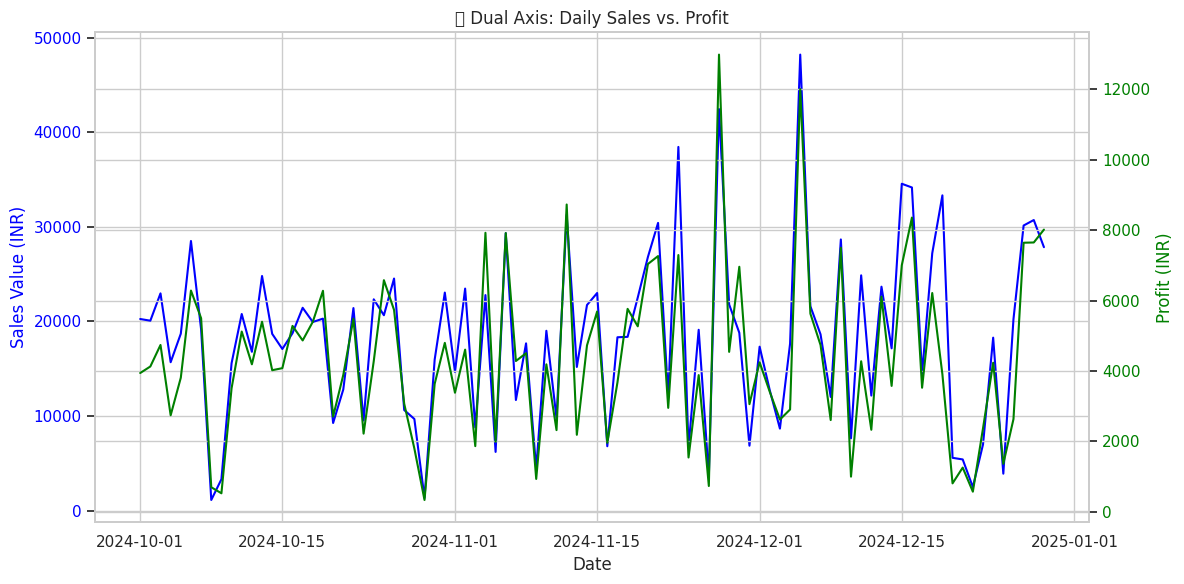

In [15]:
# Group sales and profit by date
daily_data = df.groupby("Date")[["Total Sales Value", "Total Profit"]].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Sales Value (INR)', color='blue')
ax1.plot(daily_data["Date"], daily_data["Total Sales Value"], color='blue', label='Sales')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Profit (INR)', color='green')
ax2.plot(daily_data["Date"], daily_data["Total Profit"], color='green', label='Profit')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("📊 Dual Axis: Daily Sales vs. Profit")
fig.tight_layout()
plt.show()


###Customer Retention vs. Acquisition

In [16]:
# Count first purchase per customer
first_purchase = df.groupby("Customer Name")["Date"].min().reset_index()
first_purchase.columns = ["Customer Name", "First Purchase Date"]

# Merge with main data
df_merged = df.merge(first_purchase, on="Customer Name")
df_merged["Customer Type"] = df_merged.apply(
    lambda row: "New" if row["Date"] == row["First Purchase Date"] else "Returning", axis=1
)

# Count new vs returning
retention_stats = df_merged["Customer Type"].value_counts()
print("🧑‍🤝‍🧑 Customer Type Breakdown:\n", retention_stats)


🧑‍🤝‍🧑 Customer Type Breakdown:
 Customer Type
Returning    488
New           12
Name: count, dtype: int64


###ABC Analysis (Inventory Prioritization)

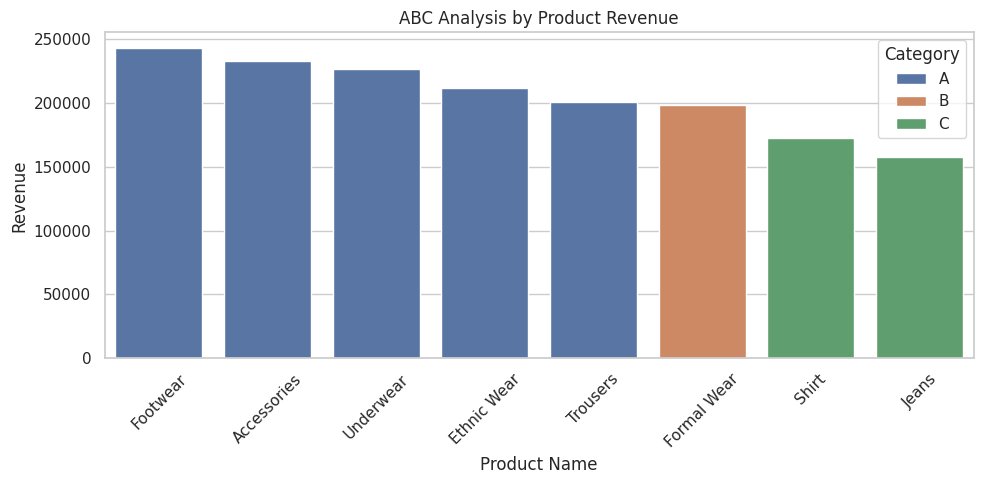

In [22]:
# 📌 Install if running in Colab
# !pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
# Assuming that df is still available from previous steps, we don't need to reload it here

# Preprocess
df['Date'] = pd.to_datetime(df['Date'])
# Corrected column names based on likely existing columns
df['Revenue'] = df['Total Sales Value']  # Assuming Total Sales Value is the Revenue
# 'Total Profit' column was used successfully earlier, so we'll rely on that for profit

# -------- ABC Analysis --------
# Using 'Revenue' column created above (Total Sales Value)
abc = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).reset_index()
abc['Cumulative %'] = 100 * abc['Revenue'].cumsum() / abc['Revenue'].sum()

def categorize(row):
    if row['Cumulative %'] <= 70:
        return 'A'
    elif row['Cumulative %'] <= 90:
        return 'B'
    else:
        return 'C'
abc['Category'] = abc.apply(categorize, axis=1)

# Plot ABC Classification
plt.figure(figsize=(10, 5))
sns.barplot(x='Product Name', y='Revenue', hue='Category', data=abc)
plt.xticks(rotation=45)
plt.title("ABC Analysis by Product Revenue")
plt.tight_layout()
plt.show()




###Pareto Analysis (80/20 Rule)


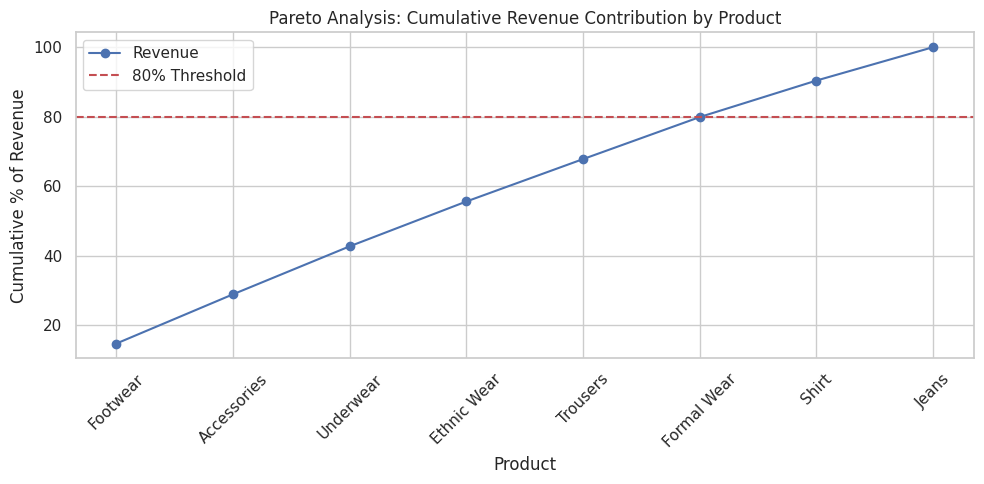

In [20]:
# -------- Pareto Analysis --------
# Using 'Revenue' column created above (Total Sales Value)
pareto = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).cumsum()
total_revenue = df['Revenue'].sum()
pareto_percentage = pareto / total_revenue * 100

plt.figure(figsize=(10,5))
pareto_percentage.plot(kind='line', marker='o')
plt.axhline(80, color='r', linestyle='--', label='80% Threshold')
plt.title('Pareto Analysis: Cumulative Revenue Contribution by Product')
plt.xlabel('Product')
plt.ylabel('Cumulative % of Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


###Time Series Forecasting

<ipython-input-21-10fe40a5b3b3>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Revenue'].sum()


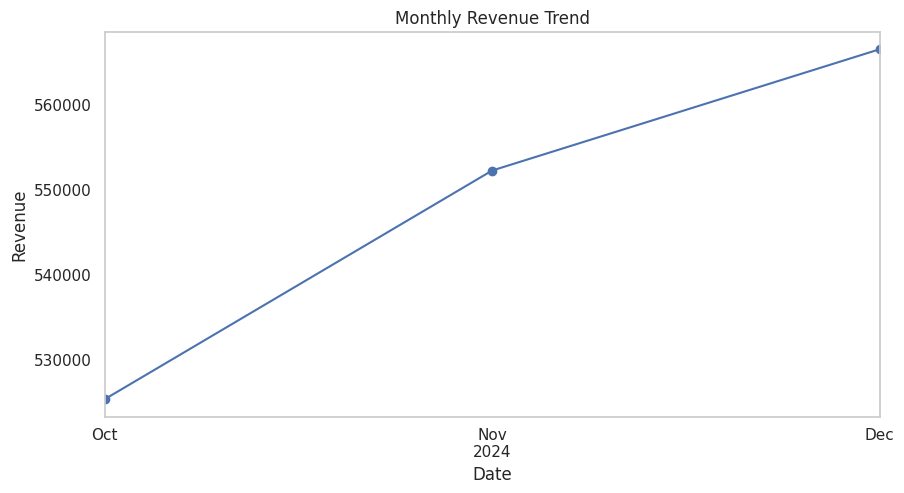

In [21]:

# -------- Sales Forecast (Monthly) --------
# Using 'Revenue' column created above (Total Sales Value)
monthly_sales = df.resample('M', on='Date')['Revenue'].sum()
monthly_sales.plot(marker='o', figsize=(10,5), title="Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.grid()
plt.show()